In [251]:
import numpy as np
import os
import pint
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10,7


ureg = pint.UnitRegistry()

In [252]:
ROOT = '/home/maxsen/DEEPL/data/training_data/test/'

list_of_images = [ROOT + i for i in os.listdir(ROOT)]
size_of_pixel = 0.11*ureg.micrometer * 0.11*ureg.micrometer
size_of_pixel = 0.11 * 0.11
print(list_of_images)

['/home/maxsen/DEEPL/data/training_data/test/Nuclei_SN_Hyb2_pos_116chunk3.npy']


In [253]:
def get_pixel_area(numpy_array, size_of_pixel):
    height, width, dim = numpy_array.shape
    dsplits = np.dsplit(numpy_array, dim)
    
    '''
    # used to show the masks
    plt.imshow(np.dstack((dsplits[0], dsplits[0], dsplits[0])))
    plt.show()
    for i in dsplits:
        plt.imshow(np.dstack((i*100, i*100, i*100)))
        plt.show()
    '''
    dsplits = dsplits[1:]
    db = {1:[], 2:[], 3:[]}
    
    counts = [np.unique(one_array, return_counts=True) for one_array in dsplits]
    counts = [list(i) for i in counts]
    for i in counts:
        index = i[0][1]
        count = i[1][1] * size_of_pixel
        db[index].append(count)
        
    return db

In [266]:
def plot_nuclei_size(list_of_sizes, num_bins):

    fig, ax = plt.subplots()
    
    mu = np.mean(list_of_sizes)  # mean of distribution
    sigma = np.std(list_of_sizes)  # standard deviation of distribution

    n, bins, patches = ax.hist(list_of_sizes, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel('Size in \u03BCm**2')
    ax.set_ylabel('Frequency')
    #ax.text(4, 0.5, r"")

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    

In [267]:
def iterate_through_images(folder, size_of_pixel):
    all_nuclei_sizes = []
    for img in list_of_images:
        numpy_array = np.load(img)
        counts = get_pixel_area(numpy_array, size_of_pixel)
        print(img)
        if 1 in counts:
            [all_nuclei_sizes.append(i) for i in counts[1]]

    print()
    plot_nuclei_size(all_nuclei_sizes, len(all_nuclei_sizes))

/home/maxsen/DEEPL/data/training_data/test/Nuclei_SN_Hyb2_pos_116chunk3.npy



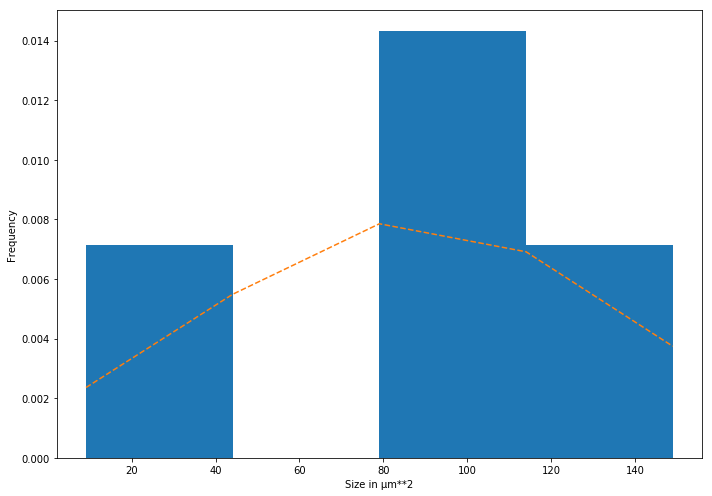

In [268]:
iterate_through_images(list_of_images, size_of_pixel)